In [13]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import Counter

from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import FreqDist

lemmatizer = WordNetLemmatizer()

%matplotlib inline

In [14]:
nltk.download('stopwords')
nltk.download('inaugural')
nltk.download('wordnet')

STOP = stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/ran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to /home/ran/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
def get_pres_id():
    pres_list = inaugural.fileids()
    name_set = set()
    result = []
    for line in pres_list:
        year, n = line.rstrip(".txt").split("-")
        if n not in name_set:
            name_set.add(n)
            result.append((year, n, line))
        else:
            continue
    return result

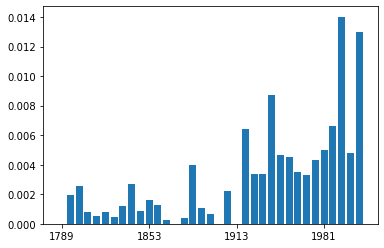

In [16]:
def keywords(ids):
    x = []
    y = []
    keyw = 'america,democracy,freedom,protection'.split(',')
    for year, name, fileid in ids:
        
        words = [lemmatizer.lemmatize(w.lower()) for w in inaugural.words(fileid) if w.isalnum()]
        ctr = Counter(words)
        
        cnt = sum([ctr[i] for i in keyw])
        all_words = len(inaugural.words(fileid))
        ratio = cnt/all_words
        
        x.append(year)
        y.append(ratio)
    return x, y
ids = get_pres_id()
x, y = keywords(ids)
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
ax.bar(x, y)
plt.show()